# APA Laboratori 2 - Visualitzacio

In [1]:
# Uncomment to upgrade packages
# !pip install pandas --upgrade 
# !pip install numpy --upgrade
# !pip install scipy --upgrade
# !pip install statsmodels --upgrade
# !pip install scikit-learn --upgrade
%load_ext autoreload

In [2]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('precision', 3)

In [3]:
# extra imports
from numpy.linalg import eig
from numpy.random import multivariate_normal
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pandas import read_csv
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

In [4]:
np.random.seed(222)

## Example 1: Comparison between PCA and LDA on 2D toy data

 Fisher's discriminant analysis (FDA) is a method that finds a linear combination of features to project or separate two or more classes of objects

If your goal is to perform (linear) dimensionality reduction for class discrimination, you should use FDA instead of PCA; PCA is useful for signal representation (but not necessarily for discrimination)

 Sigma is a 2x2 positive-definite symmetric matrix specifying the covariance matrix of two variables

In [5]:
N= 200

Sigma = np.array(((2,1.3),(1.3,1)))
Sigma

array([[2. , 1.3],
       [1.3, 1. ]])

 these are the eigenvalues:

In [6]:
eig(Sigma)[0]

array([2.89283883, 0.10716117])

Let's create class 1 ('red' class)

In [7]:


mean_1 = np.array((2,0))                         

X_red = multivariate_normal(mean_1,Sigma,N)

 Let's create class 2 ('green' class)

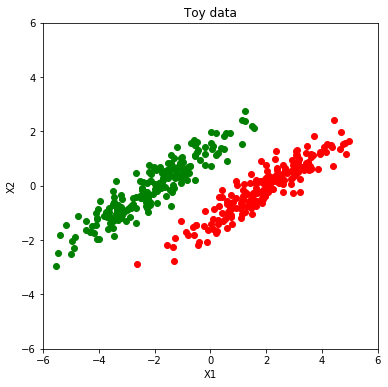

In [8]:
mean_2 = -mean_1

X_green = multivariate_normal(mean_2,Sigma,N)

fig, ax = plt.subplots(figsize=(6,6))
plt.plot(X_red[:,0],X_red[:,1],'ro',X_green[:,0],X_green[:,1],'go')
ax.set_xlim([-6,6])
ax.set_ylim([-6,6])
ax.set_xlabel("X1")
ax.set_ylabel("X2")
plt.title("Toy data");

 Now we glue both classes one after the other and create a dataframe

In [9]:
d= pd.DataFrame({'Target':['red']*N + ['green']*N, 
                 'X1': np.hstack((X_red[:,0], X_green[:,0])), 
                 'X2':np.hstack((X_red[:,1], X_green[:,1]))})
d.describe(include='all')

,Target,X1,X2
count,400,400.000,400.000
unique,2,NaN,NaN
top,green,NaN,NaN
freq,200,NaN,NaN
mean,NaN,-0.068,-0.051
std,NaN,2.450,1.026
min,NaN,-5.530,-2.938
25%,NaN,-1.974,-0.799
50%,NaN,0.032,0.039
75%,NaN,1.900,0.670


call to FDA (also known as LDA, because it is linear)

In [10]:
myLDA = LinearDiscriminantAnalysis()

myLDA.fit(d[['X1','X2']], d['Target'])

print('Priors:')
pd.DataFrame(myLDA.priors_)
print('Means:')
pd.DataFrame(myLDA.means_)
print('Coefs:')
pd.DataFrame(myLDA.coef_)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

Priors:


,0
0,0.5
1,0.5


Means:


,0,1
0,-2.034,-0.021
1,1.898,-0.081


Coefs:


,0,1
0,12.997,-17.17


 Now we show the best projection direction on the original space. This direction maximizes the separability of the classes. For that, we first need the slope:

In [11]:
LDAslope = myLDA.scalings_[1]/myLDA.scalings_[0]
LDAslope

array([-1.32109019])

 And now we can perform the visualization:

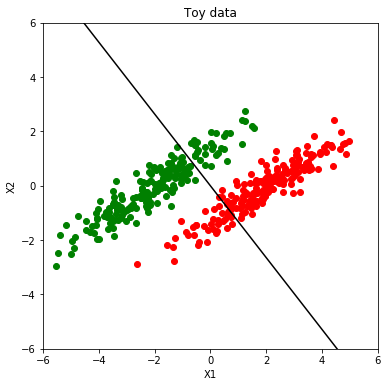

In [12]:
fig, ax = plt.subplots(figsize=(6,6))
plt.plot(X_red[:,0],X_red[:,1],'ro',X_green[:,0],X_green[:,1],'go')
plt.plot(np.linspace(-6,6), LDAslope*np.linspace(-6,6),c='k')
ax.set_xlim([-6,6])
ax.set_ylim([-6,6])
ax.set_xlabel("X1")
ax.set_ylabel("X2")
plt.title("Toy data");

 We can also compute the projections of the two classes

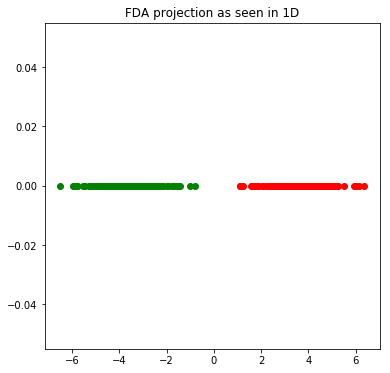

In [13]:
myLDA_proj = d['X1'] * myLDA.scalings_[0] + d['X2'] * myLDA.scalings_[1]

fig, ax = plt.subplots(figsize=(6,6))
plt.plot(myLDA_proj[:N], [0]*N, 'ro' , myLDA_proj[N:], [0]*N, 'go')
plt.title('FDA projection as seen in 1D')
ax.set_xlabel=('Discriminant');

 To understand what is going on, do:

In [14]:
print('Priors:')
pd.DataFrame(myLDA.priors_)
print('Means:')
pd.DataFrame(myLDA.means_)
print('Coefs:')
pd.DataFrame(myLDA.coef_)

Priors:


,0
0,0.5
1,0.5


Means:


,0,1
0,-2.034,-0.021
1,1.898,-0.081


Coefs:


,0,1
0,12.997,-17.17


of which ...

In [15]:
print('Scalings:')
pd.DataFrame(myLDA.scalings_)

Scalings:


,0
0,1.800
1,-2.378


 ... are the coefficients of the linear discriminant

 So we are projecting the data into the direction that maximizes (linear) separability:

 `projection(X) = X1*myLDA.scalings_[0] + X2*myLDA.scalings[1]`

---

 Now we compute PCA:

In [16]:
myPCA = PCA(whiten=True)
myPCA.fit(StandardScaler().fit_transform(d[['X1','X2']]));

 Now we need to project the data in the first principal component

In [17]:
PCAslope1 = myPCA.components_[1,0]/myPCA.components_[0,0]
PCAslope2 = myPCA.components_[1,1]/myPCA.components_[0,1]
PCAslope1
PCAslope2

0.9999999999999993

-1.0000000000000007

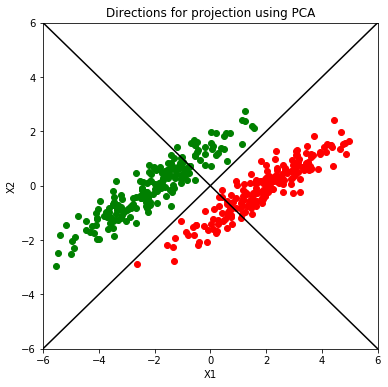

In [18]:
fig, ax = plt.subplots(figsize=(6,6))
plt.plot(X_red[:,0],X_red[:,1],'ro',X_green[:,0],X_green[:,1],'go')
plt.plot(np.linspace(-6,6), PCAslope1*np.linspace(-6,6),c='k')
plt.plot(np.linspace(-6,6), PCAslope2*np.linspace(-6,6),c='k')
ax.set_xlim([-6,6])
ax.set_ylim([-6,6])
ax.set_xlabel("X1")
ax.set_ylabel("X2")
plt.title("Directions for projection using PCA");

 We can see that the FDA projection maximices separability while the PCA projection maximices variability
 
 The rotation matrix allows to transform the data to an ortogonal space

In [19]:
pd.DataFrame(myPCA.components_)

,0,1
0,-0.707,-0.707
1,-0.707,0.707


If we apply the rotation matrix to the data we obtain a new dataset where most of the variance is held by the first components

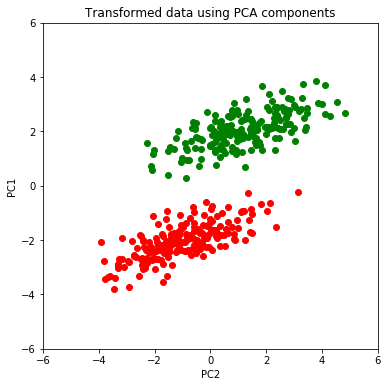

In [20]:
tr_data = myPCA.transform(d[['X1','X2']])

fig, ax = plt.subplots(figsize=(6,6))
plt.plot(tr_data[:N,0],tr_data[:N,1],'ro',
         tr_data[N:,0],tr_data[N:,1],'go')
ax.set_xlim([-6,6])
ax.set_ylim([-6,6])
ax.set_xlabel("PC2")
ax.set_ylabel("PC1")
plt.title("Transformed data using PCA components");

## Example 2: Visualizing crabs with FDA

 Campbell studied rock crabs of the genus "Leptograpsus" in 1974. One
 species, Leptograpsus variegatus, had been split into two new species,
previously grouped by colour (orange and blue). Preserved specimens
 lose their colour, so it was hoped that morphological differences
 would enable museum material to be classified.

 Data is available on 50 specimens of each sex of each species (so 200 in total),
 collected on sight at Fremantle, Western Australia. Each specimen has
 measurements on: the width of the frontal lobe (FL), the rear width (RW),
 the length along the carapace midline (CL), the maximum width (CW) of 
 the carapace, and the body depth (BD) in mm, in addition to
 colour (that is, species) and sex.


In [21]:
crabs_data= read_csv("crabs.csv", header=0)
crabs_data.describe(include='all')
crabs_data.head()

,sp,sex,index,FL,RW,CL,CW,BD
count,200,200,200.000,200.000,200.000,200.000,200.000,200.000
unique,2,2,NaN,NaN,NaN,NaN,NaN,NaN
top,B,M,NaN,NaN,NaN,NaN,NaN,NaN
freq,100,100,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,25.500,15.583,12.738,32.105,36.415,14.030
std,NaN,NaN,14.467,3.495,2.573,7.119,7.872,3.425
min,NaN,NaN,1.000,7.200,6.500,14.700,17.100,6.100
25%,NaN,NaN,13.000,12.900,11.000,27.275,31.500,11.400
50%,NaN,NaN,25.500,15.550,12.800,32.100,36.800,13.900
75%,NaN,NaN,38.000,18.050,14.300,37.225,42.000,16.600


,sp,sex,index,FL,RW,CL,CW,BD
0,B,M,1,8.1,6.7,16.1,19.0,7.0
1,B,M,2,8.8,7.7,18.1,20.8,7.4
2,B,M,3,9.2,7.8,19.0,22.4,7.7
3,B,M,4,9.6,7.9,20.1,23.1,8.2
4,B,M,5,9.8,8.0,20.3,23.0,8.2


 The goal is to separate the 200 crabs into four classes, given by the 2x2 configurations for sex (Male/Female) and species (Blue/Orange)

In [22]:
crabs_data['Class'] =  crabs_data.sp + crabs_data.sex

 Now 'BF' stands now for 'Blue Female', and so on

In [23]:
crabs_data.groupby('Class').size()

Class
BF    50
BM    50
OF    50
OM    50
dtype: int64

 using the rest of the variables as predictors (except 'index', which is only an index)

In [24]:
crabs_sel = crabs_data[['FL', 'RW','CL','CW','BD']]
crabs_sel.describe()

,FL,RW,CL,CW,BD
count,200.000,200.000,200.000,200.000,200.000
mean,15.583,12.738,32.105,36.415,14.030
std,3.495,2.573,7.119,7.872,3.425
min,7.200,6.500,14.700,17.100,6.100
25%,12.900,11.000,27.275,31.500,11.400
50%,15.550,12.800,32.100,36.800,13.900
75%,18.050,14.300,37.225,42.000,16.600
max,23.100,20.200,47.600,54.600,21.600


 Various preliminary plots (notice all 5 predictors are continuous)

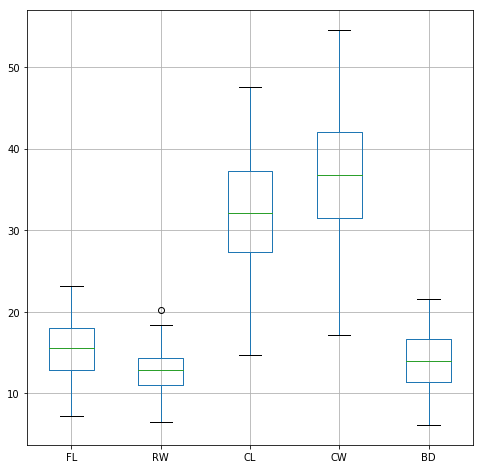

In [25]:
fig, ax = plt.subplots(figsize=(8,8))
crabs_sel.boxplot();

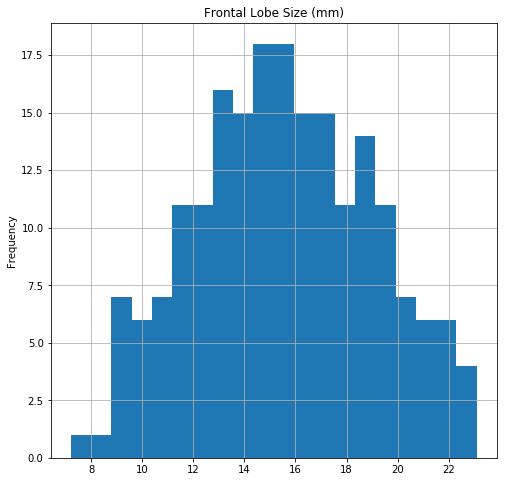

In [26]:
fig, ax = plt.subplots(figsize=(8,8))
plt.title('Frontal Lobe Size (mm)')
ax.set_ylabel('Frequency')
crabs_sel.FL.hist(bins=20);

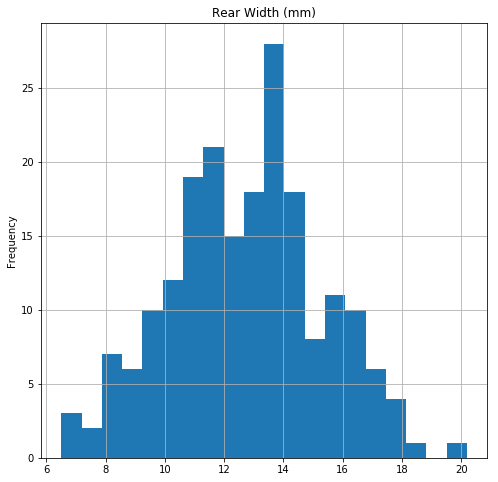

In [27]:
fig, ax = plt.subplots(figsize=(8,8))
plt.title('Rear Width (mm)')
ax.set_ylabel('Frequency')
crabs_sel.RW.hist(bins=20);

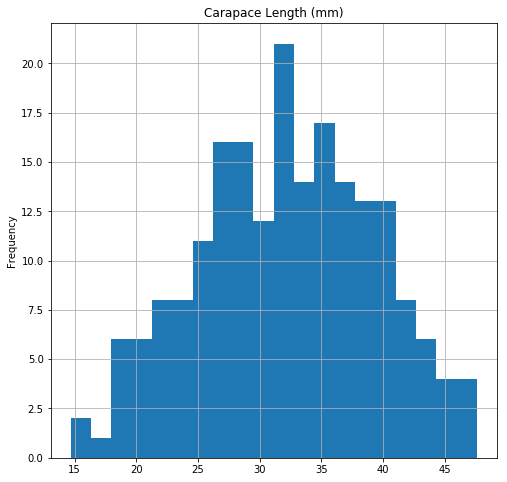

In [28]:
fig, ax = plt.subplots(figsize=(8,8))
plt.title('Carapace Length (mm)')
ax.set_ylabel('Frequency')
crabs_sel.CL.hist(bins=20);

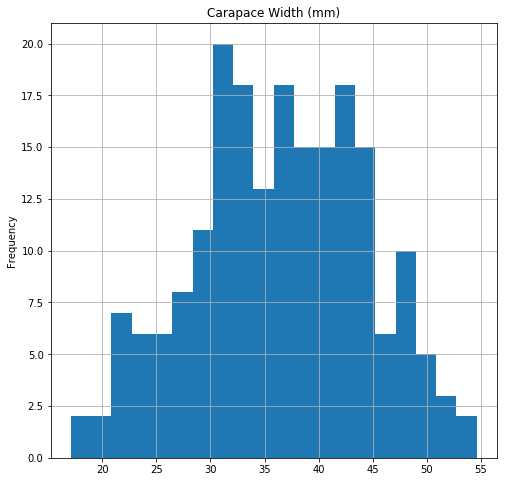

In [29]:
fig, ax = plt.subplots(figsize=(8,8))
plt.title('Carapace Width (mm)')
ax.set_ylabel('Frequency')
crabs_sel.CW.hist(bins=20);

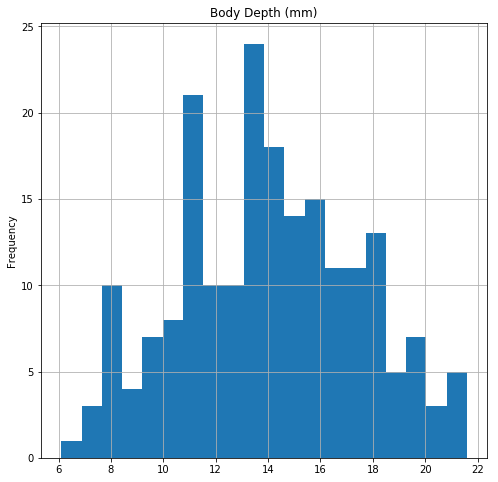

In [30]:
fig, ax = plt.subplots(figsize=(8,8))
plt.title('Body Depth (mm)')
ax.set_ylabel('Frequency')
crabs_sel.BD.hist(bins=20);

 Now let's visualize data using FDA

In [31]:
lda_model = LinearDiscriminantAnalysis()

crabs_trans = pd.DataFrame(lda_model.fit_transform(crabs_sel, crabs_data.Class))
crabs_trans.columns=['LD1', 'LD2', 'LD3']

print('Priors:')
pd.DataFrame(lda_model.priors_)
print('Means:')
pd.DataFrame(lda_model.means_)
print('Coefs:')
pd.DataFrame(lda_model.coef_)
print('Explained Variance Ratio')
pd.DataFrame(lda_model.explained_variance_ratio_ )

Priors:


,0
0,0.25
1,0.25
2,0.25
3,0.25


Means:


,0,1,2,3,4
0,13.270,12.138,28.102,32.624,11.816
1,14.842,11.718,32.014,36.810,13.350
2,17.594,14.836,34.618,39.036,15.632
3,16.626,12.262,33.688,37.188,15.324


Coefs:


,0,1,2,3,4
0,-3.556,1.623,-1.912,3.777,-2.930
1,-4.659,-3.829,0.192,4.673,-4.538
2,5.734,4.448,-1.547,-3.367,2.874
3,2.482,-2.243,3.267,-5.083,4.594


Explained Variance Ratio


,0
0,0.686
1,0.300
2,0.014


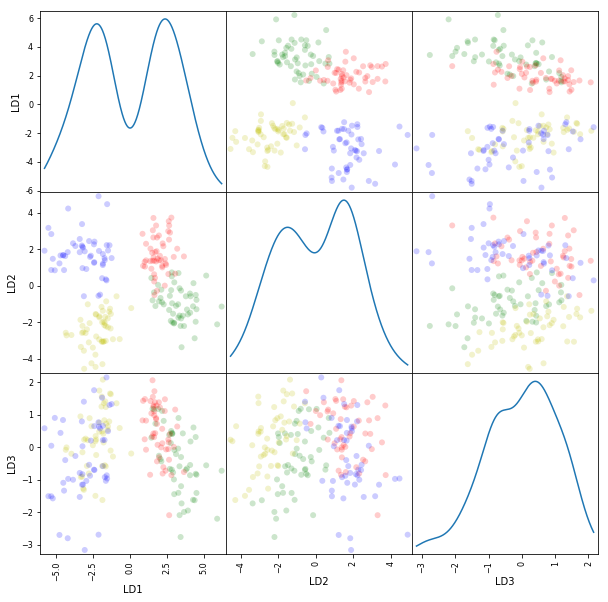

In [32]:
colors_crabs = {'BF':'r', 'BM':'g', 'OF':'b', 'OM':'y'}

scatter_matrix(crabs_trans, 
               alpha=0.2, 
               figsize=(10, 10), 
               diagonal='kde',
               marker='o', 
               c=crabs_data.Class.apply(lambda x: colors_crabs[x]));

 As there are four classes (called 'groups' in LDA), we get three linear discriminants (LDs) for projection (always the number of classes minus 1)


 We are performing dimensionality reduction 5D --> 3D, and plotting the projected data into the first two LDs (the 2 most important dimensions)

 We do our own plotting method, with color and legend:

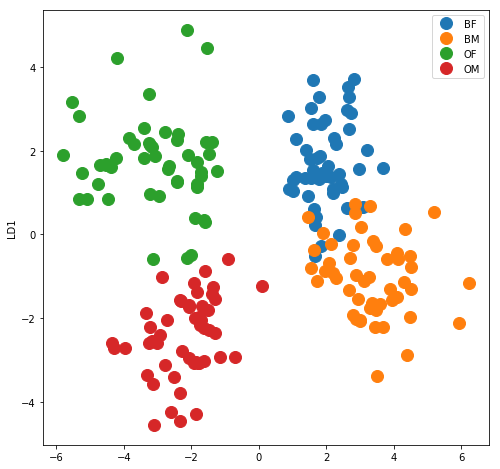

In [33]:
crabs_trans['Class'] = crabs_data.Class
groups = crabs_trans.groupby('Class')

fig, ax = plt.subplots(figsize=(8,8))
for name, group in groups:
    ax.plot(group.LD1, 
            group.LD2, 
            marker='o', 
            linestyle='', 
            ms=12, 
            label=name)
ax.legend()
ax.set_ylabel('LD2')
ax.set_ylabel('LD1');

 The result is quite satisfactory, right? We can see that the 5 continuous predictors do indeed represent 4 different crabs. 

 We can also see that crabs of the Blue "variety" are less different 
 (regarding males and females) than those in the Orange variety

In [34]:
crabs_trans.describe()

,LD1,LD2,LD3
count,2.000e+02,2.000e+02,2.000e+02
mean,6.102e-15,8.633e-15,-6.173e-15
std,2.896e+00,2.053e+00,1.068e+00
min,-5.795e+00,-4.557e+00,-3.168e+00
25%,-2.356e+00,-1.691e+00,-7.675e-01
50%,4.740e-01,1.571e-01,1.394e-01
75%,2.606e+00,1.623e+00,7.960e-01
max,6.228e+00,4.899e+00,2.155e+00


 Now let's analyze the numerical output of lda() in more detail:

In [35]:
print('Priors:')
pd.DataFrame(lda_model.priors_)
print('Means:')
pd.DataFrame(lda_model.means_)
print('Coefs:')
pd.DataFrame(lda_model.scalings_)
print('Explained Variance Ratio')
pd.DataFrame(lda_model.explained_variance_ratio_ )

Priors:


,0
0,0.25
1,0.25
2,0.25
3,0.25


Means:


,0,1,2,3,4
0,13.270,12.138,28.102,32.624,11.816
1,14.842,11.718,32.014,36.810,13.350
2,17.594,14.836,34.618,39.036,15.632
3,16.626,12.262,33.688,37.188,15.324


Coefs:


,0,1,2
0,-1.554,0.195,-1.667
1,-0.625,1.539,0.456
2,-0.188,-1.095,0.681
3,1.516,0.644,-0.655
4,-1.355,-0.515,1.286


Explained Variance Ratio


,0
0,0.686
1,0.300
2,0.014


 "Prior probabilities of groups" is self-explanatory (these are estimated from the data, but can be overriden by the 'prior' parameter)

 "Group means" is also self-explanatory (these are our mu's)

 "Coefficients of linear discriminants" are the scaling factors we have been using to project data. These have been normalized so that the within-groups covariance matrix is spherical (a multiple of the identity). 

 This means that the larger the coefficient of a predictor,
 the more important the predictor is for the discrimination:

In [36]:
coefs = pd.DataFrame(lda_model.scalings_)
coefs.columns=['LD1', 'LD2', 'LD3']
coefs.index=['FL', 'RW','CL','CW','BD']
coefs

,LD1,LD2,LD3
FL,-1.554,0.195,-1.667
RW,-0.625,1.539,0.456
CL,-0.188,-1.095,0.681
CW,1.516,0.644,-0.655
BD,-1.355,-0.515,1.286


 We can interpret our plot so that the horizontal axis (LD1) separates the groups mainly by using FL, CW and BD;
 the vertical axis (LD2) separates the groups mainly by using RW and some CL, etc

 The "Proportion of trace" is the proportion of between-class variance that is explained by successive discriminants (LDs)

 For instance, in our case LD1 explains 68.6% of the total between-class variance

 In this case, the first two LDs account for 98.56% of total between-class variance, fairly close to 100%

 This means that the third dimension adds but a little bit of discriminatory information. Let's visualize the crabs in 3D:

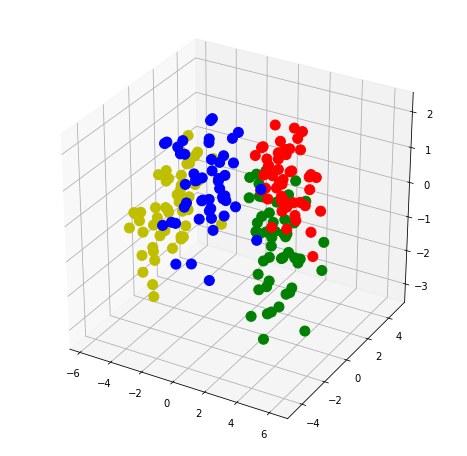

In [37]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

plt.scatter(crabs_trans.LD1,
            crabs_trans.LD2,
            zs=crabs_trans.LD3, 
            depthshade=False, 
            c=crabs_trans.Class.apply(lambda x: colors_crabs[x]), s=100);

 As the measurements are lengths, it could be sensible to take logarithms

In [38]:
lda_logmodel = LinearDiscriminantAnalysis()

crabs_logtrans = pd.DataFrame(lda_logmodel.fit_transform(np.log(crabs_sel), crabs_data.Class))
crabs_logtrans.columns=['LD1', 'LD2', 'LD3']

In [39]:
print('Priors:')
pd.DataFrame(lda_logmodel.priors_)
print('Means:')
pd.DataFrame(lda_logmodel.means_)
print('Coefs:')
pd.DataFrame(lda_logmodel.scalings_)
print('Explained Variance Ratio')
pd.DataFrame(lda_logmodel.explained_variance_ratio_ )

Priors:


,0
0,0.25
1,0.25
2,0.25
3,0.25


Means:


,0,1,2,3,4
0,2.565,2.475,3.313,3.462,2.441
1,2.673,2.444,3.438,3.578,2.561
2,2.852,2.684,3.529,3.650,2.733
3,2.788,2.490,3.490,3.589,2.702


Coefs:


,0,1,2
0,-31.217,2.851,-25.720
1,-9.485,24.653,6.067
2,-9.822,-38.579,31.679
3,65.950,21.376,-30.600
4,-17.998,-6.002,14.541


Explained Variance Ratio


,0
0,0.689
1,0.302
2,0.009


The model looks a bit better, given that he first two LDs now account for 99.09% of total between-class variance, very good indeed, so a 3D plot does not add anything visual

 As an example, the first (log) LD is given by:

    `LD1 = -31.2*log(FL) - 9.5*log(RW) - 9.8*log(CL) + 66*log(CW) - 18*log(BD)`

get the new loadings

plot the projected data in the first two LDs

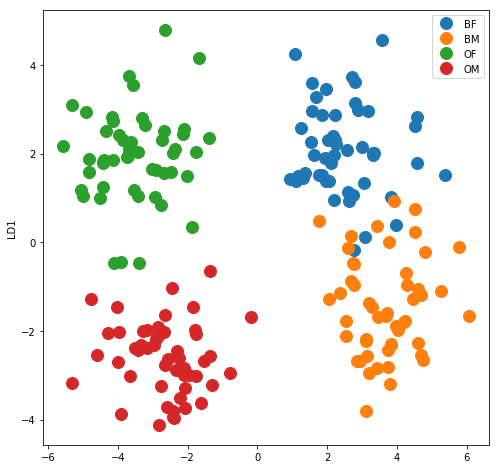

In [40]:
crabs_logtrans['Class'] = crabs_data.Class
groups = crabs_logtrans.groupby('Class')

fig, ax = plt.subplots(figsize=(8,8))
for name, group in groups:
    ax.plot(group.LD1, 
            group.LD2, 
            marker='o', 
            linestyle='', 
            ms=12, 
            label=name)
ax.legend()
ax.set_ylabel('LD2')
ax.set_ylabel('LD1');

The first coordinate clearly expresses the difference between species, and the second the difference between sexes!